# Understanding the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Data

train = pd.read_csv('/Users/raymondguo/Desktop/datasci/calories/playground-series-s5e5/train.csv')
test = pd.read_csv('/Users/raymondguo/Desktop/datasci/calories/playground-series-s5e5/test.csv')
test

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,750000,male,45,177.0,81.0,7.0,87.0,39.8
1,750001,male,26,200.0,97.0,20.0,101.0,40.5
2,750002,female,29,188.0,85.0,16.0,102.0,40.4
3,750003,female,39,172.0,73.0,20.0,107.0,40.6
4,750004,female,30,173.0,67.0,16.0,94.0,40.5
...,...,...,...,...,...,...,...,...
249995,999995,female,56,159.0,62.0,6.0,85.0,39.4
249996,999996,male,32,202.0,101.0,3.0,84.0,38.4
249997,999997,female,31,164.0,64.0,14.0,98.0,40.1
249998,999998,female,62,158.0,61.0,25.0,106.0,40.7


In [20]:
# Understand some descriptive statistics about the variables
train.describe()

,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781
std,216506.495284,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349
min,0.000000,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,187499.750000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,374999.500000,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000
75%,562499.250000,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000
max,749999.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


In [22]:
# Remove the id column
train = train.drop(['id'], axis=1)

From initial observation, it appears that there are 0 pieces of missing data. The id is not a predictive variable and therefore can be removed for the purposes of the task, with the rest of the variables being predictors and the 'Calories' variable being the outcome variable of this ask. My thoughts prior to starting the task is that there may need to be min-max scaling applied to the variables since their degree of intensity relative to each other will likely be different, thus affecting the predictive model.

### Visualisation of Distribution

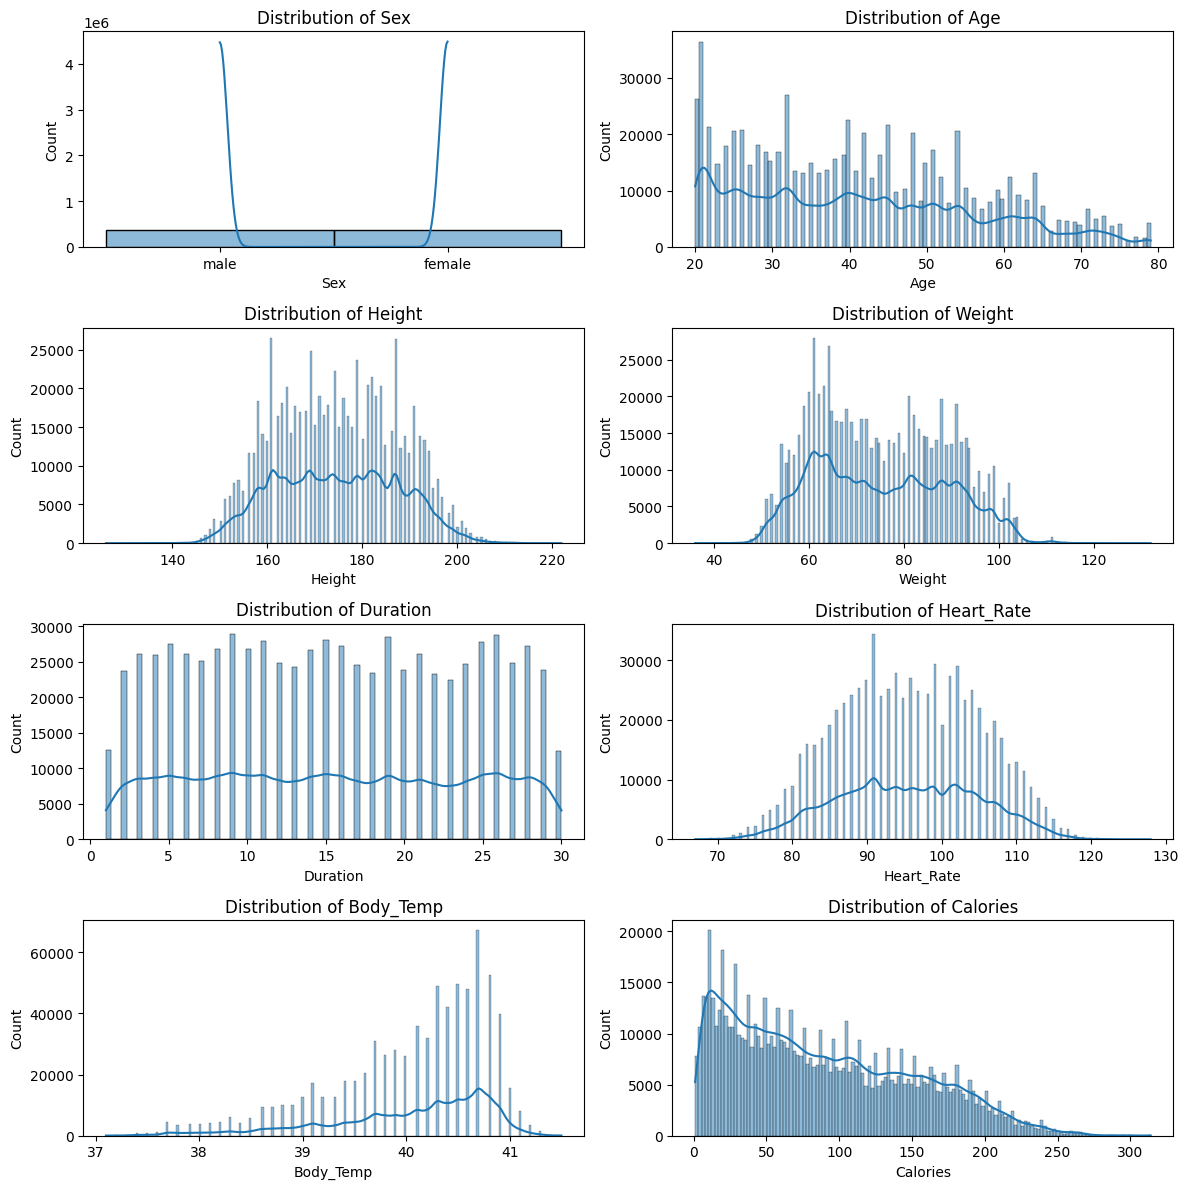

In [7]:
variables = ['Sex', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12,12))
axes = axes.flatten()
for i, col in enumerate(variables):
    sns.histplot(data=train, x=col, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')

for j in range(len(variables), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

From observations about the data, we can see that the distribution of males and females is highly uniform, which is verified by their distribution counts which is almost 50-50. The age distribution shows that we are only counting from 20 to 80, with a somewhat uniform, but naturally declining sample as age continues. The height and weight follow standard normal distributions, explained naturally by the large sample size of 750000. There is also an even an uniform duration of exercise for the study, but a normal distribution with regards to the heart rate of the individuals. The body temperature distribution is clearly negatively skewed towards the latter part of the distribution, whilst the calories distribution is skewed positively towards the lower number of calories.

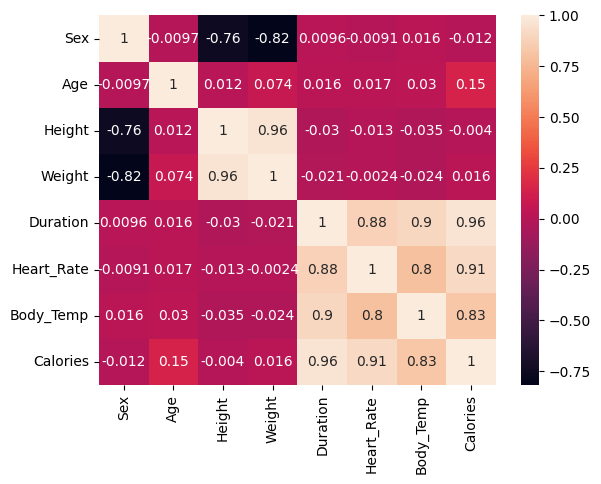

In [23]:
# Correlation between variables

# First encode the Sex to numerical value
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
# Plot the correlation plot
ax = sns.heatmap(train.corr(), annot=True)

From observing the data, one can see that sex certainly predicts height and weight quite strongly, but it's correlation with other variables is not strong at all. Height and weight are strong predictors of each other, and with sex, but for all other variables, they are not directly involved especially with duration of exercise, the hear rate, and body temperature. Unsurprisingly, the duration, heart rate, body temperature and caolories are all highly correlated with one another.